# Project: Wrangle and Analyze Data (WeRateDogs)

The following document shows the process and code for gathering, assessing, cleaning, analyzing and visualizing data through a dataset containing information about tweets from Twitter account WeRateDogs.

## Gather

- The WeRateDogs Twitter archive. Downloaded manually from this link: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv

- The tweet image predictions. Downloaded programmatically using the Requests library and the following url: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [5]:
# Get contents of the Url
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [2]:
# Store the file in a new folder.
import os

folder_name = 'tweet_img_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

- Each tweet's retweet count and favorite ("like") count along with additional data. Downloaded by using the tweet IDs to query the Twitter API for each tweet's JSON data using Python's Tweepy library and then storing the JSON data in a file called tweet_json.txt. The .txt file was read into a pandas Dataframe.

In [5]:
# Crate tweeter API.
import tweepy

consumer_key = 'xxxxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxxxxxxx'
access_secret = 'xxxxxxxxxxxxxxxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [3]:
# Download information about tweets.
import time
import pandas as pd

df = pd.read_csv('twitter-archive-enhanced.csv')
tweet_data = {}
tweet_errors = {}

for tweet_id in df['tweet_id']:
    try:
        tweet = api.get_status(tweet_id)
        tweet_data[str(tweet_id)] = tweet._json
        print(tweet_id)
    except Exception as e:
        print(str(tweet_id) + ':' + str(e))
        tweet_errors[tweet_id] = tweet

In [29]:
# Writes tweets information in a new file.
import json 

with open('tweet_json.txt', 'w') as outfile:
    json.dump(tweet_data, outfile,
             sort_keys = True,
             indent = 4,
             ensure_ascii = False)

## Assess

In [1]:
# Creates new df for twitter-archive-enhanced
import pandas as pd

df = pd.read_csv('twitter-archive-enhanced.csv')
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [2]:
# Creates new df for tweet_img_predictions
predictions_df = pd.read_csv('tweet_img_predictions/image-predictions.tsv', sep='\t')
predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [3]:
# Creates new df for tweet_json
df_tweepy = pd.read_json('tweet_json.txt', orient = 'index')
df_tweepy

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2564,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,520,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,130,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,125,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,44,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,300,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,141,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,109,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 22:05:58.794694657,NaN,NaN,2015-11-16 00:30:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/fv...,133,0,NaN,666050758794694656,666050758794694656,...,NaN,NaN,NaN,58,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 22:24:13.826850816,NaN,NaN,2015-11-16 00:35:11,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/v5...,1230,0,NaN,666051853826850816,666051853826850816,...,NaN,NaN,NaN,856,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 23:25:25.042405380,NaN,NaN,2015-11-16 00:49:46,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/rd...,439,0,NaN,666055525042405376,666055525042405376,...,NaN,NaN,NaN,257,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 23:51:30.499244032,NaN,NaN,2015-11-16 00:55:59,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/yW...,298,0,NaN,666057090499244032,666057090499244032,...,NaN,NaN,NaN,142,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-09 00:16:40.524156928,NaN,NaN,2015-11-16 01:01:59,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/pY...,112,0,NaN,666058600524156928,666058600524156928,...,NaN,NaN,NaN,58,0,NaN,"<a href=""htt

In [14]:
# Datatypes and empty cells for DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [29]:
# Tweets that don't have a name for the dog.
df[df['name'] == 'None'].count()

tweet_id                      745
in_reply_to_status_id          77
in_reply_to_user_id            77
timestamp                     745
source                        745
text                          745
retweeted_status_id            65
retweeted_status_user_id       65
retweeted_status_timestamp     65
expanded_urls                 686
rating_numerator              745
rating_denominator            745
name                          745
doggo                         745
floofer                       745
pupper                        745
puppo                         745
dtype: int64

In [19]:
# The different numerators used across the dataset
df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [30]:
# Tweets with a rating numerator below 10
df[df['rating_numerator']<10].count()

tweet_id                      440
in_reply_to_status_id          12
in_reply_to_user_id            12
timestamp                     440
source                        440
text                          440
retweeted_status_id             9
retweeted_status_user_id        9
retweeted_status_timestamp      9
expanded_urls                 430
rating_numerator              440
rating_denominator            440
name                          440
doggo                         440
floofer                       440
pupper                        440
puppo                         440
dtype: int64

In [36]:
# Rows with no value for any dog stage.
df[(df['doggo']=='None') & (df['floofer']=='None') & (df['pupper']=='None') & (df['puppo']=='None')].count()

tweet_id                      1976
in_reply_to_status_id           70
in_reply_to_user_id             70
timestamp                     1976
source                        1976
text                          1976
retweeted_status_id            145
retweeted_status_user_id       145
retweeted_status_timestamp     145
expanded_urls                 1923
rating_numerator              1976
rating_denominator            1976
name                          1976
doggo                         1976
floofer                       1976
pupper                        1976
puppo                         1976
dtype: int64

In [15]:
# Duplicated tweet id's.
df[df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [11]:
# Rows that the name in name column start with a lowercase letter.
df[df['name'].str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [10]:
# Datatype and missing values for predictions_df
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
# Rows with more than one img for column img_num.
predictions_df[(predictions_df['img_num'] > 1)].count()

tweet_id    295
jpg_url     295
img_num     295
p1          295
p1_conf     295
p1_dog      295
p2          295
p2_conf     295
p2_dog      295
p3          295
p3_conf     295
p3_dog      295
dtype: int64

In [5]:
# Datatypes and missing values for df_tweepy
df_tweepy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
id                2345 non-null int64
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [9]:
# Duplicated id's.
df_tweepy[df_tweepy.id.duplicated()]

,id,retweet_count,favorite_count


### Quality
#### Twitter Archive Enhanced
- 181 rows are retweets (not original tweets).
- 'tweet_id' is an int.
- 59 rows are missing the extended url. 
- 1976 rows without a value for any of the dog classification (either doggo, floofer, pupper, puppo).
- Rows with incorrect name for the dog such as 'a', 'an', 'quite', etc.
- Some expaned urls have two urls in the same row.
- The timestamp column is a string datatype.

#### Image Predictions
- 2075 rows, when the twitter archive enhanced df has 2356.
- 'tweet_id' is an int.
- Some breed names for p1, p2 and p3 start with a uppercase letter and some others with a lowercase letter.

#### Tweet Json
- 2345 rows, when the twitter archive enhanced df has 2356.
- Id column datatype is an int.

### Tidiness
#### Twitter Archive Enhanced
- Column headers are values not variable names. There is a seperate column to determine if the dog is a puppo, a seperate column for doggo, yet another for floofer, and lastly one more for pupper.

#### Twitter Archive Enhanced - Image Predictions - Tweet Json
- All tables should be merged into one.

## Clean

In [58]:
# Create a copy of each dataframe
df_clean = df.copy()
predictions_df_clean = predictions_df.copy()
df_tweepy_clean = df_tweepy.copy()

### Tidiness

#### Define
Merge the three tables into one.

#### Code

In [59]:
# Create new dataframe with columns 'id', 'retweet_count' and 'favorite_count'.
df_tweepy_clean = df_tweepy_clean[['id', 'retweet_count', 'favorite_count']].copy()
df_tweepy_clean = df_tweepy_clean.reset_index(drop=True)
df_tweepy_clean.head()

,id,retweet_count,favorite_count
0,666020888022790144,520,2564
1,666029285002620928,47,130
2,666033412701032448,44,125
3,666044226329800704,141,300
4,666049248165822464,40,109


In [60]:
# Rename 'id' column as 'tweet_id' for the df_tweepy_clean.
df_tweepy_clean.rename(index=str, columns={'id':'tweet_id'}, inplace=True)

In [61]:
# Merge all tables on 'tweet_id'.
df_clean = df_clean.merge(predictions_df_clean,
                          on=['tweet_id'])
df_clean = df_clean.merge(df_tweepy_clean,
                          on=['tweet_id'])

#### Test

In [62]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1347 entries, 0 to 1346
Data columns (total 30 columns):
tweet_id                      1347 non-null int64
in_reply_to_status_id         15 non-null float64
in_reply_to_user_id           15 non-null float64
timestamp                     1347 non-null object
source                        1347 non-null object
text                          1347 non-null object
retweeted_status_id           47 non-null float64
retweeted_status_user_id      47 non-null float64
retweeted_status_timestamp    47 non-null object
expanded_urls                 1347 non-null object
rating_numerator              1347 non-null int64
rating_denominator            1347 non-null int64
name                          1347 non-null object
doggo                         1347 non-null object
floofer                       1347 non-null object
pupper                        1347 non-null object
puppo                         1347 non-null object
jpg_url                       1347 

#### Define
Create a new column labeled 'dog_stage', look for the dog stage in the appropiate columns. Finally, drop the columns for 'doggo', 'floofer', 'pupper', 'puppo'.

#### Code

In [63]:
import numpy as np
# Creates new column 'dog_stage'
df_clean['dog_stage'] = np.empty

In [64]:
# Extracts the dog stage from the tweet
df_clean['dog_stage'] = df_clean['text'].str.extract('([dD]oggo|[fF]loofer|[pP]upper|[pP]uppo)')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [65]:
# Drops the 'doggo', 'floofer', 'pupper', 'puppo' columns.
dog_labels = ['doggo', 'floofer', 'pupper', 'puppo']
df_clean = df_clean.drop(dog_labels, axis=1)

#### Test

In [66]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1347 entries, 0 to 1346
Data columns (total 27 columns):
tweet_id                      1347 non-null int64
in_reply_to_status_id         15 non-null float64
in_reply_to_user_id           15 non-null float64
timestamp                     1347 non-null object
source                        1347 non-null object
text                          1347 non-null object
retweeted_status_id           47 non-null float64
retweeted_status_user_id      47 non-null float64
retweeted_status_timestamp    47 non-null object
expanded_urls                 1347 non-null object
rating_numerator              1347 non-null int64
rating_denominator            1347 non-null int64
name                          1347 non-null object
jpg_url                       1347 non-null object
img_num                       1347 non-null int64
p1                            1347 non-null object
p1_conf                       1347 non-null float64
p1_dog                        1347 

In [67]:
df_clean['dog_stage'].value_counts()

pupper     157
doggo      39 
puppo      21 
Doggo      4  
Pupper     4  
Floofer    4  
Name: dog_stage, dtype: int64

### Quality

#### Define
Delete rows that are retweets.

#### Code

In [68]:
# Finds all retweets
df_clean[(df_clean['expanded_urls'].str.contains('dog_rates')==False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
44,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",...,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True,81,0,pupper
82,860924035999428608,NaN,NaN,2017-05-06 18:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @tallylott: h*ckin adorable promposal. 13/10 @dog_rates https://t.co/6n8hzNihJ9,8.609145e+17,3.638908e+08,2017-05-06 17:49:42 +0000,"https://twitter.com/tallylott/status/860914485250469888/photo/1,https://twitter.com/tallylott/status/860914485250469888/photo/1,https://twitter.com/tallylott/status/860914485250469888/photo/1,https://twitter.com/tallylott/status/860914485250469888/photo/1",...,False,oscilloscope,0.012591,False,paper_towel,0.011178,False,856,0,NaN
110,851861385021730816,NaN,NaN,2017-04-11 18:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @eddie_coe98: Thanks @dog_rates completed my laptop. 10/10 would buy again https://t.co/bO0rThDlXI,8.482894e+17,3.410211e+08,2017-04-01 21:42:03 +0000,"https://twitter.com/eddie_coe98/status/848289382176100353/photo/1,https://twitter.com/eddie_coe98/status/848289382176100353/photo/1",...,False,purse,0.066505,False,pillow,0.044725,False,23,0,NaN
120,847971574464610304,NaN,NaN,2017-04-01 00:39:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @basic_vacek_: I love my new mug easy 13/10 @dog_rates https://t.co/0bYtoL7Wwt,8.479710e+17,5.970642e+08,2017-04-01 00:36:55 +0000,"https://twitter.com/basic_vacek_/status/847971000004354048/photo/1,https://twitter.com/basic_vacek_/status/847971000004354048/photo/1",...,False,cup,0.273392,False,toilet_tissue,0.066656,False,467,0,NaN
140,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,"https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1",...,False,monitor,0.001406,False,envelope,0.001093,False,37,0,NaN
395,771004394259247104,NaN,NaN,2016-08-31 15:19:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @katieornah: @dog_rates learning a lot at college 12/10 for my professor thank u for the pupper slides https://t.co/nTFDr99hg0,7.710021e+17,1.732729e+09,2016-08-31 15:10:07 +0000,"https://twitter.com/katieornah/status/771002130450743296/photo/1,https://twitter.com/katieornah/status/771002130450743296/photo/1",...,False,iPod,0.052741,False,pop_bottle,0.048821,False,246,0,pupper
450,757597904299253760,NaN,NaN,2016-07-25 15:26:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @jon_hill987: @dog_rates There is a cunningly disguised pupper here mate! 11/10 at least. https://t.co/7boff8zojZ,7.575971e+17,2.804798e+08,2016-07-25 15:23:28 +0000,"https://twitter.com/jon_hill987/status/75759

In [69]:
# Creates a new dataframe without the retweets
df_clean = df_clean[(df_clean['expanded_urls'].str.contains('dog_rates')==True)]

#### Test

In [70]:
# Finds all retweets. Should be empty.
df_clean[(df_clean['expanded_urls'].str.contains('dog_rates')==False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage


#### Define
Delete unnecessary columns.

#### Code

In [71]:
labels = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
          'retweeted_status_user_id', 'retweeted_status_timestamp']
df_clean.drop(labels, axis=1, inplace=True)

#### Test

In [72]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1346
Data columns (total 22 columns):
tweet_id              1338 non-null int64
timestamp             1338 non-null object
source                1338 non-null object
text                  1338 non-null object
expanded_urls         1338 non-null object
rating_numerator      1338 non-null int64
rating_denominator    1338 non-null int64
name                  1338 non-null object
jpg_url               1338 non-null object
img_num               1338 non-null int64
p1                    1338 non-null object
p1_conf               1338 non-null float64
p1_dog                1338 non-null bool
p2                    1338 non-null object
p2_conf               1338 non-null float64
p2_dog                1338 non-null bool
p3                    1338 non-null object
p3_conf               1338 non-null float64
p3_dog                1338 non-null bool
retweet_count         1338 non-null int64
favorite_count        1338 non-null int64

#### Define
Change 'tweet_id' datatype from int to str.

#### Code

In [73]:
# Change 'tweet_id' datatype from int to str.
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)

#### Test

In [74]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1346
Data columns (total 22 columns):
tweet_id              1338 non-null object
timestamp             1338 non-null object
source                1338 non-null object
text                  1338 non-null object
expanded_urls         1338 non-null object
rating_numerator      1338 non-null int64
rating_denominator    1338 non-null int64
name                  1338 non-null object
jpg_url               1338 non-null object
img_num               1338 non-null int64
p1                    1338 non-null object
p1_conf               1338 non-null float64
p1_dog                1338 non-null bool
p2                    1338 non-null object
p2_conf               1338 non-null float64
p2_dog                1338 non-null bool
p3                    1338 non-null object
p3_conf               1338 non-null float64
p3_dog                1338 non-null bool
retweet_count         1338 non-null int64
favorite_count        1338 non-null int6

#### Define
Show the text in its entirety.

#### Code

In [75]:
pd.set_option('display.max_colwidth', -1)

#### Test

In [76]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
0,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,malamute,0.078253,True,kelpie,0.031379,True,4202,25094,NaN
1,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8730,42254,NaN
2,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9499,40406,NaN
3,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3146,20263,NaN
4,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,19100,65715,NaN


#### Define
Look for the dog name and change it in the column 'name'.

#### Code

In [77]:
# Extracts dog name from 'text' column and writes it in 'name'.
df_clean['name'] = df_clean['text'].str.extract("(?:This\sis\s|Meet\s)([A-Z][a-zA-Z]*)")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


#### Test

In [78]:
df_clean['name'].value_counts()

Oliver        7
Winston       7
Tucker        7
Lucy          6
Bailey        6
Toby          5
Bella         5
Penny         5
Lola          5
Bo            5
Cooper        5
Scout         4
Sadie         4
Dexter        4
Milo          4
Sophie        4
Larry         4
Clark         4
Jax           3
Gary          3
Shadow        3
Ellie         3
Ruby          3
Sammy         3
Alfie         3
Stanley       3
Gus           3
Louis         3
Charlie       3
Finn          3
             ..
Boomer        1
Abby          1
Jonah         1
Dixie         1
Berb          1
Sierra        1
Siba          1
G             1
Brat          1
Julius        1
Kevon         1
Shnuggles     1
Louie         1
Stephan       1
Livvie        1
Klein         1
Callie        1
Reggie        1
Roscoe        1
Gizmo         1
Willow        1
Coopson       1
Rodman        1
Tobi          1
Eazy          1
Fizz          1
Schnozz       1
Brandonald    1
Mookie        1
Remus         1
Name: name, Length: 615,

#### Define
Change values in p1, p2 and p3 to start with an uppercase letter.

#### Code

In [79]:
df_clean['p1'] = df_clean['p1'].str.capitalize()
df_clean['p2'] = df_clean['p2'].str.capitalize()
df_clean['p3'] = df_clean['p3'].str.capitalize()

#### Test

In [80]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
0,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,4202,25094,NaN
1,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,8730,42254,NaN
2,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9499,40406,NaN
3,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3146,20263,NaN
4,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,19100,65715,NaN


#### Define
For those rows that have a duplicated url in expanded_urls, erase the duplicates.

#### Code

In [81]:
df_clean['expanded_urls'] = df_clean['expanded_urls'].str.extract('([^,]+)')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


#### Test

In [82]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
0,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,4202,25094,NaN
1,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,8730,42254,NaN
2,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9499,40406,NaN
3,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3146,20263,NaN
4,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,https://twitter.com/dog_rates/status/890729181411237888/photo/1,13,10,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,19100,65715,NaN


In [83]:
df_clean.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
1342,666058600524156928,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8,10,NaN,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,...,True,Komondor,0.192305,True,Soft-coated_wheaten_terrier,0.082086,True,58,112,NaN
1343,666057090499244032,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,NaN,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,...,False,Shopping_basket,0.014594,False,Golden_retriever,0.007959,True,142,298,NaN
1344,666051853826850816,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,NaN,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,...,False,Mud_turtle,0.045885,False,Terrapin,0.017885,False,856,1230,NaN
1345,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,...,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True,141,300,NaN
1346,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,...,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,47,130,NaN


#### Define
Change the column 'timestamp' datatype from string to datetime.

#### Code

In [84]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

#### Test

In [85]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1346
Data columns (total 22 columns):
tweet_id              1338 non-null object
timestamp             1338 non-null datetime64[ns]
source                1338 non-null object
text                  1338 non-null object
expanded_urls         1338 non-null object
rating_numerator      1338 non-null int64
rating_denominator    1338 non-null int64
name                  829 non-null object
jpg_url               1338 non-null object
img_num               1338 non-null int64
p1                    1338 non-null object
p1_conf               1338 non-null float64
p1_dog                1338 non-null bool
p2                    1338 non-null object
p2_conf               1338 non-null float64
p2_dog                1338 non-null bool
p3                    1338 non-null object
p3_conf               1338 non-null float64
p3_dog                1338 non-null bool
retweet_count         1338 non-null int64
favorite_count        1338 non-nu

#### Define
Change those values in the 'dog_stage' column that start with a lowercase letter so that they start with an uppercase letter.

#### Code

In [86]:
df_clean['dog_stage'] = df_clean['dog_stage'].str.capitalize()

#### Test

In [87]:
df_clean['dog_stage'].value_counts()

Pupper     158
Doggo      43 
Puppo      21 
Floofer    4  
Name: dog_stage, dtype: int64

#### Define
Capture the correct values for rating numerators and denominators so that columns contain decimals when appropiate.

#### Code

In [88]:
# Extracts numerators and denominators from text and writes them in their appropiate columns
ratings = df_clean.text.str.extract('((?:\d+\.)?\d+)\/((?:\d+\.)?\d+)', expand=True)
df_clean['rating_numerator'] = ratings[0]
df_clean['rating_denominator'] = ratings[1]

#### Test

In [89]:
df_clean['rating_numerator'].value_counts()

10       308
12       302
11       259
13       166
9        96 
8        64 
7        35 
6        22 
14       19 
5        18 
4        13 
3        13 
2        5  
1        4  
143      1  
9.75     1  
165      1  
1776     1  
60       1  
420      1  
144      1  
11.27    1  
44       1  
13.5     1  
45       1  
204      1  
88       1  
24       1  
Name: rating_numerator, dtype: int64

In [90]:
df_clean['rating_denominator'].value_counts()

10     1327
50     2   
2      1   
20     1   
170    1   
130    1   
80     1   
40     1   
120    1   
150    1   
7      1   
Name: rating_denominator, dtype: int64

In [91]:
# Write the clean df into a csv file.
df_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Insights and Visualizations

In [92]:
# Imports the matplotlib library
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import pandas as pd

dog_df = pd.read_csv('twitter_archive_master.csv')

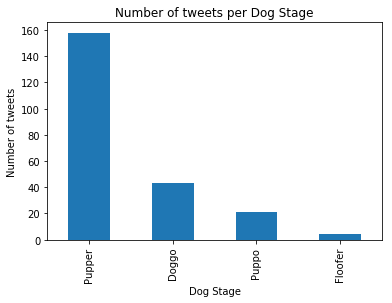

In [93]:
dog_df['dog_stage'].value_counts().plot(kind='bar', title='Number of tweets per Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Number of tweets');

Most of the tweets didn't provide a stage for the dog. From those that stated the dog stage, most of them are Pupper.

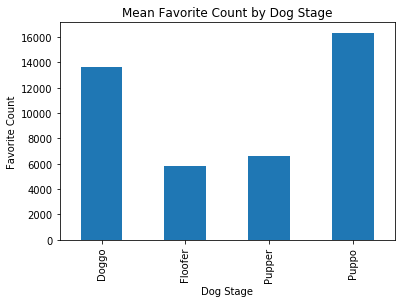

In [16]:
df_favorite_stage = dog_df.groupby('dog_stage')['favorite_count'].mean()
df_favorite_stage.plot(kind='bar', title='Mean Favorite Count by Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Favorite Count');

Puppo is the dog stage that received more favorite counts in average, with aroung 16,000 favorites, followed by Doggo with around 14,000 and Pupper and Floofer both at around 6,000.

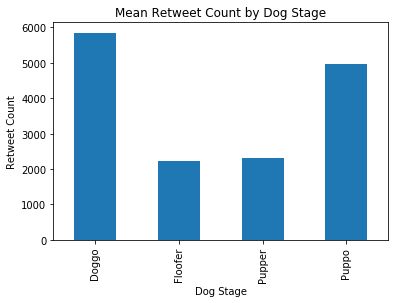

In [17]:
df_retweet_stage = dog_df.groupby('dog_stage')['retweet_count'].mean()
df_retweet_stage.plot(kind='bar', title='Mean Retweet Count by Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Retweet Count');

Doggo is the dog stage that in average has more retweets with around 6,000 retweets followed by puppo with 5,000, and Pupper and Floofer each with around 2,000 retweets.

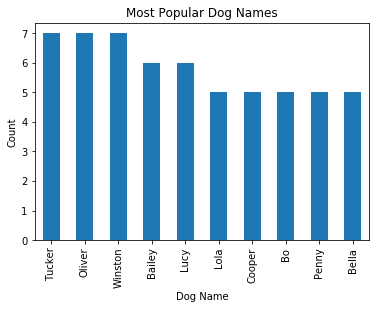

In [18]:
dog_names = dog_df['name'].value_counts()
dog_names.head(10).plot(kind='bar', title='Most Popular Dog Names')
plt.xlabel('Dog Name')
plt.ylabel('Count');

Three dog names are tied for the most popular name: Tucker, Oliver and Winston. Bailey and Lucy share the second place and Bella, Penny, Lola, Copper and Bo are tied for the third place.

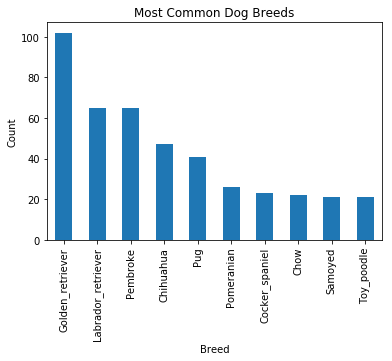

In [19]:
dog_breed = dog_df['p1'].value_counts()
dog_breed.head(10).plot(kind='bar', title='Most Common Dog Breeds')
plt.xlabel('Breed')
plt.ylabel('Count');

The most common breed type is by far, the Golden Retriever, followed by the Pembroke and Labrador Retriever.

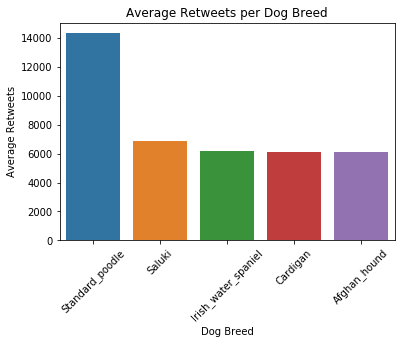

In [23]:
df_p1_dog = dog_df[(dog_df['p1_dog']==True)]
df_retweet_breed = df_p1_dog.groupby('p1')['retweet_count'].mean().reset_index()
df_retweet_breed = df_retweet_breed.rename(columns={'retweet_count' : 'retweet_mean'})
df_retweet_breed.sort_values('retweet_mean', ascending=False, inplace=True)
fig = sns.barplot(x='p1', y='retweet_mean', data=df_retweet_breed.head())
plt.xticks(rotation=45)
plt.xlabel('Dog Breed')
plt.ylabel('Average Retweets')
plt.title('Average Retweets per Dog Breed')
plt.show(fig);


Standard Poodle is the dog breed that in average got more retweets.

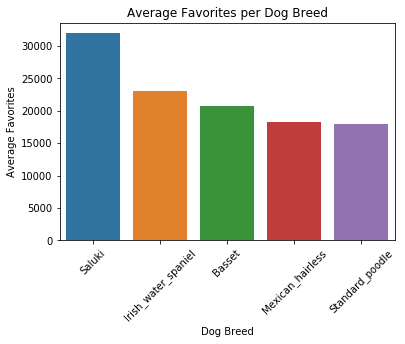

In [26]:
df_p1_dog = dog_df[(dog_df['p1_dog']==True)]
df_favorite_breed = df_p1_dog.groupby('p1')['favorite_count'].mean().reset_index()
df_favorite_breed = df_favorite_breed.rename(columns={'favorite_count' : 'favorite_mean'})
df_favorite_breed.sort_values('favorite_mean', ascending=False, inplace=True)
fig2 = sns.barplot(x='p1', y='favorite_mean', data=df_favorite_breed.head())
plt.xticks(rotation=45)
plt.xlabel('Dog Breed')
plt.ylabel('Average Favorites')
plt.title('Average Favorites per Dog Breed')
plt.show(fig2);

Saluki is the dog breed that in average received more favorites. That makes sense because Saluki was also one of the most retweeted dog breeds. Standard poodle, the top retweeted dog breed, also appears as one of the breeds with most favorites.

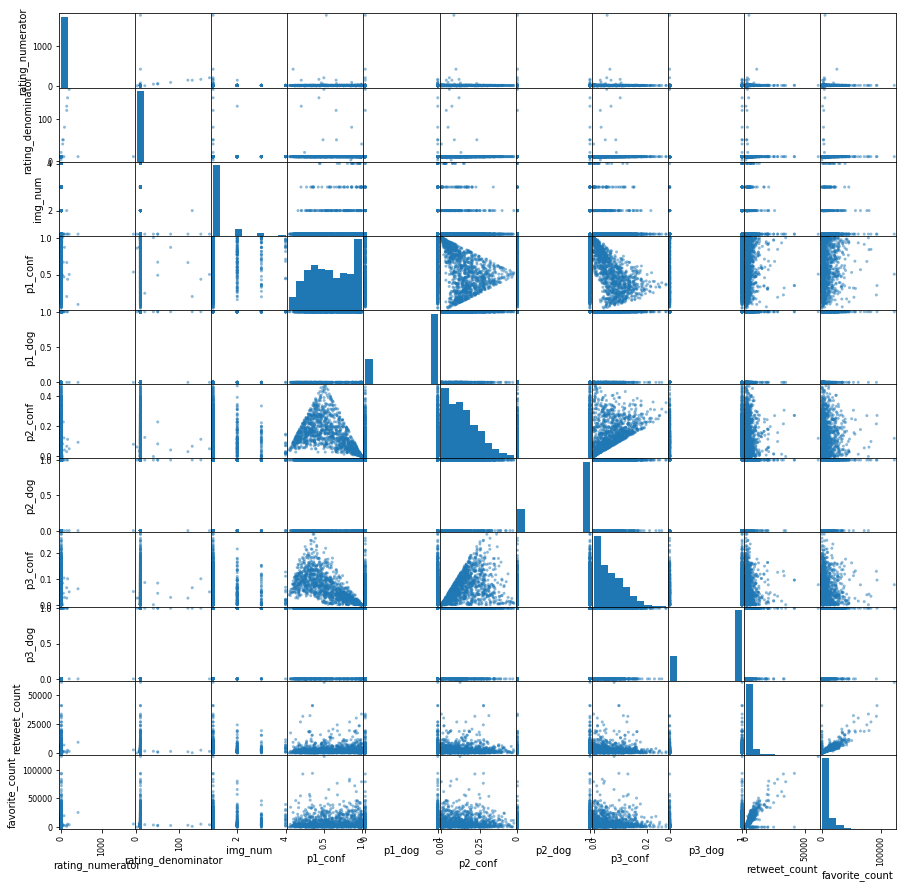

In [41]:
pd.plotting.scatter_matrix(df_clean, figsize=(15,15));

The rating numerator and denominator doesn't seem to have an impact on the amount of retweets and favorites.
There is a positive relationship between retweet count and favorite count.

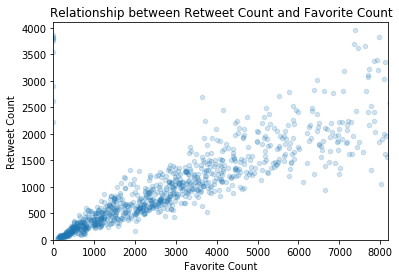

In [27]:
dog_df.plot(x='favorite_count', y='retweet_count', kind='scatter', title='Relationship between Retweet Count and Favorite Count', alpha=1/5)
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.ylim([0, 4100])
plt.xlim([0,8200]);

There is a positive correlation between Retweet count and favorite count. However the favorite count increases more rapidly than the retweet count. For example, one tweet with 2000 retweets has about 4000 to 5000 favorites. It seems that people use the favorite feature more often than the retweet feature.